In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D

In [86]:
df = pd.read_csv('preprocessed_data.csv')

In [87]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,1,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,1,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,4,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,4,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229469,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
229470,1,1,1,1,18,0,0,0,0,0,...,1,0,2,0,0,1,0,11,2,4
229471,0,0,0,1,28,0,0,0,1,1,...,1,0,5,0,0,0,0,2,5,2
229472,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


<h2><b>Dataset</b></h2>
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>Diabetes_binary</td>
<td>Diabetes status</td>
<td>0 = No diabetes, 1 = Diabetes</td>
</tr>
<tr>
<td>HighBP</td>
<td>High blood pressure</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>HighChol</td>
<td>High cholesterol</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>CholCheck</td>
<td>Cholesterol check in past 5 years</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>BMI</td>
<td>Body Mass Index</td>
<td></td>
</tr>
<tr>
<td>Smoker</td>
<td>Smoked ≥100 cigarettes</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Stroke</td>
<td>History of stroke</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>HeartDiseaseorAttack</td>
<td>History of Heart disease or heart attack</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>PhysActivity</td>
<td>Physical activity in past 30 days</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Fruits</td>
<td>Fruit consumption frequency</td>
<td>0 = &lt;1/day, 1 = ≥1/day</td>
</tr>
<tr>
<td>Veggies</td>
<td>Vegetable consumption frequency</td>
<td>0 = &lt;1/day, 1 = ≥1/day</td>
</tr>
<tr>
<td>HvyAlcoholConsump</td>
<td>Heavy alcohol consumption (adult men >=14 drinks per week and adult women>=7 drinks per week)</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>HealthCare</td>
<td>Health insurance coverage</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>NoDocbcCost</td>
<td>Couldn't see doctor due to cost in the past 12 months</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>GenHlth</td>
<td>General health rating</td>
<td>1 = Poor, 2 = Fair, 3 = Good, 4 = Very Good, 5 = Excellent</td>
</tr>
<tr>
<td>MentHlth</td>
<td>Poor mental health days</td>
<td>Scale 1-30 days</td>
</tr>
<tr>
<td>PhysHlth</td>
<td>Physical illness/injury days</td>
<td>Scale 1-30 days</td>
</tr>
<tr>
<td>DiffWalk</td>
<td>Difficulty walking/climbing stairs</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Sex</td>
<td>Gender</td>
<td>0 = Female, 1 = Male</td>
</tr>
<tr>
<td>Age</td>
<td>Age category</td>
<td>
1 = 18-24<br>
2 = 25-29<br>
3 = 30-34<br>
4 = 35-39<br>
5 = 40-44<br>
6 = 45-49<br>
7 = 50-54<br>
8 = 55-59<br>
9 = 60-64<br>
10 = 65-69<br>
11 = 70-74<br>
12 = 75-79<br>
13 = 80+
</td>
</tr>
<tr>
<td>Education</td>
<td>Education level</td>
<td>
1 = Never attended school/kindergarten<br>
2 = Elementary (Grades 1-8)<br>
3 = Some high school (Grades 9-11)<br>
4 = High school graduate/GED<br>
5 = Some college/technical school (1-3 years)<br>
6 = College graduate (4+ years)
</td>
</tr>
<tr>
<td>Income</td>
<td>Annual income</td>
<td>
1 = &lt;$10,000<br>
2 = $10k-&lt;$15k<br>
3 = $15k-&lt;$20k<br>
4 = $20k-&lt;$25k<br>
5 = $25k-&lt;$35k<br>
6 = $35k-&lt;$50k<br>
7 = $50k-&lt;$75k<br>
8 = ≥$75k
</td>
</tr>
</tbody>
</table>

In [88]:
df.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
553,0,1,0,1,29,1,0,0,1,1,...,1,0,3,0,0,0,0,11,4,2
174191,0,0,0,1,30,1,0,0,0,0,...,1,0,3,0,0,0,1,4,4,5
60457,0,0,0,1,32,1,0,0,1,1,...,1,0,3,30,0,1,0,4,4,2
155822,0,1,1,1,24,0,0,0,1,1,...,1,0,1,25,30,1,0,10,5,8
132817,0,0,0,1,27,1,0,0,0,1,...,1,0,4,0,0,0,0,6,4,8


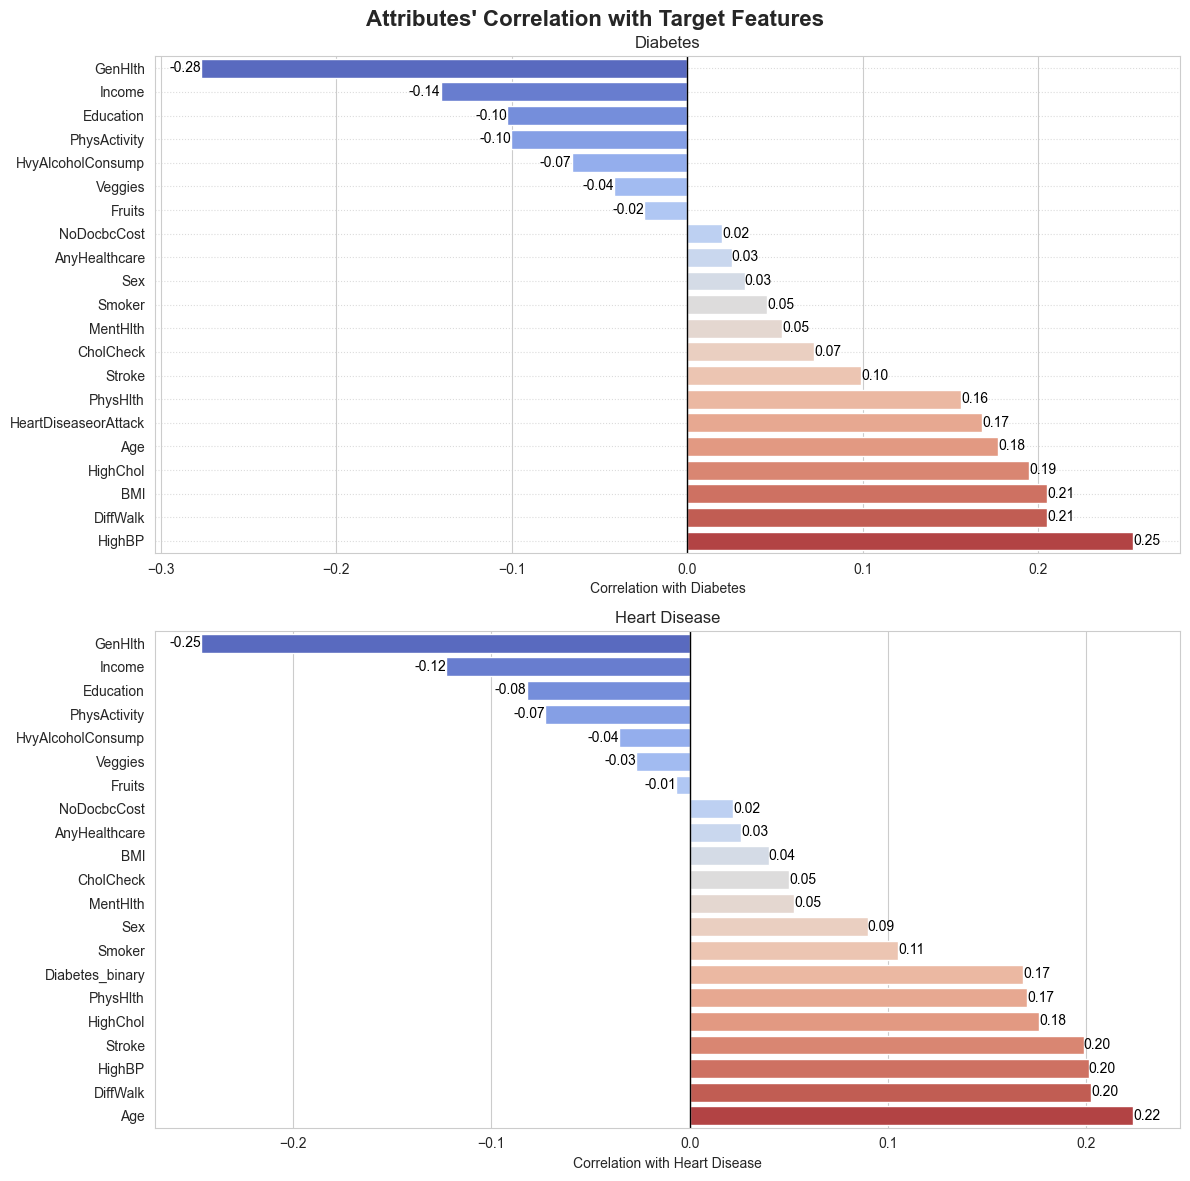

In [89]:
# Set up vertical plot grid
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.6)
sns.set_style("whitegrid")

# 1. Diabetes_binary Correlation --------------------------------------------------
# Compute correlation with Diabetes_binary
corr_values = df.corr()['Diabetes_binary'].drop('Diabetes_binary')

# Sort correlations
corr_values_sorted = corr_values.sort_values()

# Plot horizontal bar chart
sns.barplot(x=corr_values_sorted.values, y=corr_values_sorted.index, hue=corr_values_sorted.index, 
                 palette='coolwarm', orient='h', legend=False, ax=ax[0])

# Add correlation values on bars
for i, v in enumerate(corr_values_sorted):
    ax[0].text(v, i, f"{v:.2f}", color='black', va='center', ha='left' if v > 0 else 'right')

ax[0].axvline(0, color='black', linewidth=1)  # Vertical line at 0
ax[0].set_xlabel('Correlation with Diabetes')
ax[0].set_title('Diabetes')
ax[0].set_ylabel('')
ax[0].grid(axis='y', linestyle=':', alpha=0.7)

# 2. HeartDiseaseorAttack Correlation --------------------------------------------------
# Compute correlation with HeartDiseaseorAttack
corr_values = df.corr()['HeartDiseaseorAttack'].drop('HeartDiseaseorAttack')

# Sort correlations
corr_values_sorted = corr_values.sort_values()

sns.barplot(x=corr_values_sorted.values, y=corr_values_sorted.index, hue=corr_values_sorted.index, 
                 palette='coolwarm', orient='h', legend=False, ax=ax[1])

# Add correlation values on bars
for i, v in enumerate(corr_values_sorted):
    ax[1].text(v, i, f"{v:.2f}", color='black', va='center', ha='left' if v > 0 else 'right')

ax[1].axvline(0, color='black', linewidth=1)  # Vertical line at 0
ax[1].set_xlabel('Correlation with Heart Disease')
ax[1].set_ylabel('')
ax[1].set_title('Heart Disease', loc='center')

# Add global elements
plt.suptitle("Attributes' Correlation with Target Features", 
            y=0.98, fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

## Understanding Risk Factors: How Different Health Factors Relate to Diabetes and Heart Disease

This visualization shows which health factors have the strongest relationships with diabetes and heart disease. The correlation values range from -0.3 to 0.3, where:
- Positive values (red/orange bars to the right) indicate factors that increase risk
- Negative values (blue bars to the left) indicate factors that decrease risk
- Values closer to 0 mean weaker relationships

### Key Insights:
- For diabetes, high blood pressure (0.25), high cholesterol (0.19), and age (0.18) show the strongest positive associations
- For heart disease, age (0.22), high blood pressure (0.20), and stroke history (0.20) have the strongest relationships
- Good general health (-0.28 for diabetes, -0.25 for heart disease) and higher income (-0.14 for diabetes, -0.12 for heart disease) appear to be protective factors
- Physical activity shows a negative correlation with both conditions, suggesting that being active may help reduce risk

These patterns highlight the importance of managing blood pressure and cholesterol levels, especially as we age, to reduce the risk of both diabetes and heart disease.

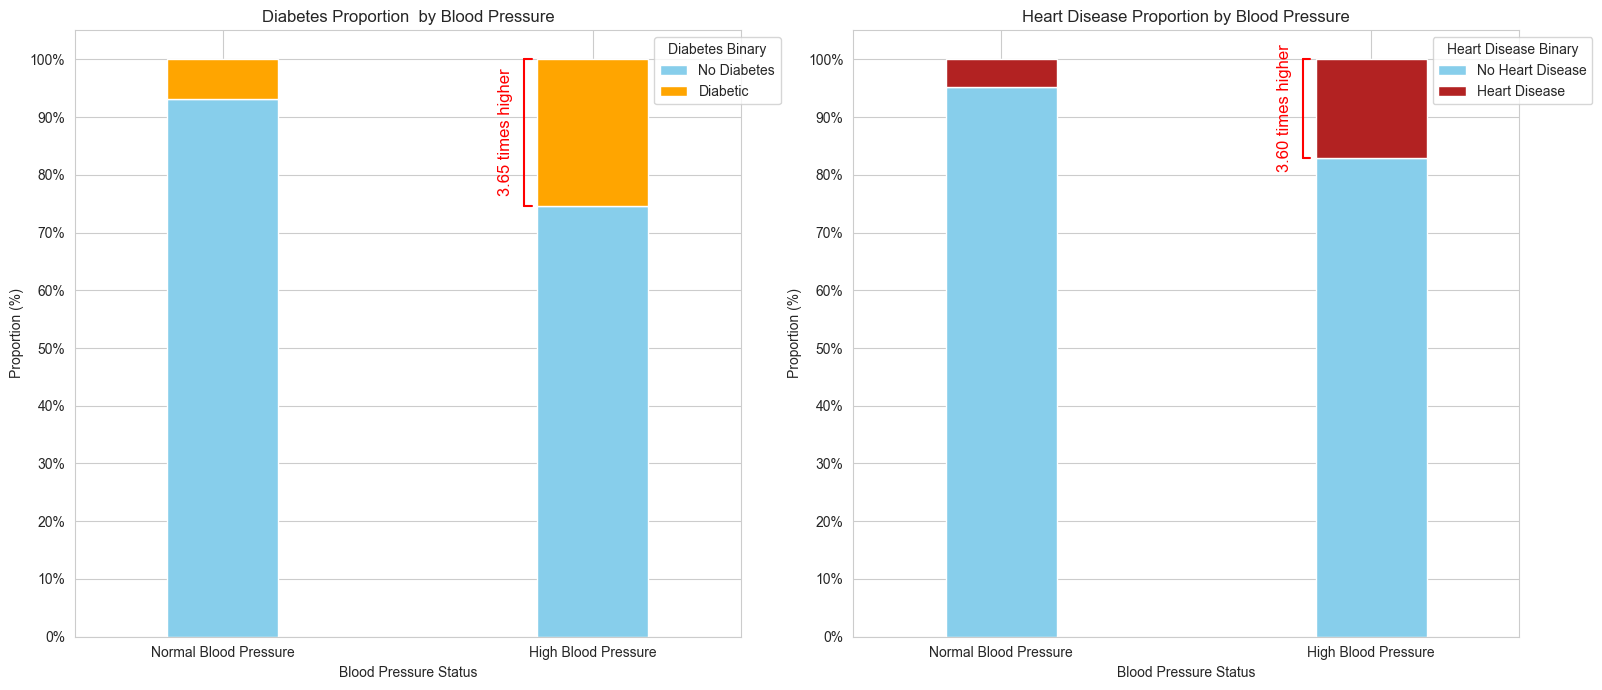

In [90]:
import matplotlib.pyplot as plt

# --- Diabetes Subplot ---

# Group by HighBP and calculate proportions for Diabetes_binary
grouped_diabetes = df.groupby('HighBP')['Diabetes_binary'].value_counts(normalize=True).unstack()
diabetes_ratio = grouped_diabetes.loc[1, 1] / grouped_diabetes.loc[0, 1]
diabetes_ratio_text = f'{diabetes_ratio:.2f} times higher'

# --- Heart Disease Subplot ---

# Group by HighBP and calculate proportions for HeartDiseaseorAttack
grouped_heart = df.groupby('HighBP')['HeartDiseaseorAttack'].value_counts(normalize=True).unstack()
heart_ratio = grouped_heart.loc[1, 1] / grouped_heart.loc[0, 1]
heart_ratio_text = f'{heart_ratio:.2f} times higher'

# --- Plotting ---

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Diabetes plot
grouped_diabetes.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], width=0.3, ax=axes[0])

axes[0].set_yticks([i / 100 for i in range(0, 101, 10)])
axes[0].set_yticklabels([f'{i}%' for i in range(0, 101, 10)])
axes[0].set_xticklabels(['Normal Blood Pressure', 'High Blood Pressure'], rotation=0)
axes[0].set_xlabel('Blood Pressure Status')
axes[0].set_ylabel('Proportion (%)')
axes[0].set_title('Diabetes Proportion  by Blood Pressure')
axes[0].legend(title='Diabetes Binary', labels=['No Diabetes','Diabetic'], loc='upper right', bbox_to_anchor=(1.07, 1))

# Draw mirrored brace for diabetes plot
y_start = grouped_diabetes.loc[1, 0]
y_end = 1
x_brace = axes[0].patches[1].get_x() - 0.035
axes[0].plot([x_brace, x_brace], [y_start, y_end], color='red')
axes[0].plot([x_brace, x_brace+0.02], [y_start, y_start], color='red')
axes[0].plot([x_brace, x_brace+0.02], [y_end, y_end], color='red')
axes[0].text(x_brace - 0.05, (y_start + y_end) / 2, diabetes_ratio_text, rotation=90, ha='center', va='center', fontsize=12, color='red')


# Heart disease plot
grouped_heart.plot(kind='bar', stacked=True, color=['skyblue', 'firebrick'], width=0.3, ax=axes[1])

axes[1].set_yticks([i / 100 for i in range(0, 101, 10)])
axes[1].set_yticklabels([f'{i}%' for i in range(0, 101, 10)])
axes[1].set_xticklabels(['Normal Blood Pressure', 'High Blood Pressure'], rotation=0)
axes[1].set_xlabel('Blood Pressure Status')
axes[1].set_ylabel('Proportion (%)')
axes[1].set_title('Heart Disease Proportion by Blood Pressure')
axes[1].legend(title='Heart Disease Binary', labels=['No Heart Disease','Heart Disease'], loc='upper right', bbox_to_anchor=(1.12, 1))

# Draw mirrored brace for heart disease plot
y_start = grouped_heart.loc[1, 0]
y_end = 1
x_brace = axes[1].patches[1].get_x() - 0.035
axes[1].plot([x_brace, x_brace], [y_start, y_end], color='red')
axes[1].plot([x_brace, x_brace+0.02], [y_start, y_start], color='red')
axes[1].plot([x_brace, x_brace+0.02], [y_end, y_end], color='red')
axes[1].text(x_brace - 0.05, (y_start + y_end) / 2, heart_ratio_text, rotation=90, ha='center', va='center', fontsize=12, color='red')

# Tight layout
plt.tight_layout()
plt.show()


## Blood Pressure: A Critical Factor in Diabetes and Heart Disease Risk

These charts reveal a striking connection between high blood pressure and increased risk of both diabetes and heart disease.

### For Diabetes:
- Among people with high blood pressure, about 25% have diabetes (orange portion)
- In contrast, only about 7% of those with normal blood pressure have diabetes
- This means you're about 3.65 times more likely to have diabetes if you have high blood pressure

### For Heart Disease:
- The risk is even more pronounced: around 17% of people with high blood pressure have heart disease (red portion)
- Only about 5% of those with normal blood pressure have heart disease
- This translates to being 3.6 times more likely to have heart disease if you have high blood pressure

These findings emphasize the critical importance of maintaining healthy blood pressure levels. Regular blood pressure monitoring and management could significantly reduce your risk of developing these serious conditions.

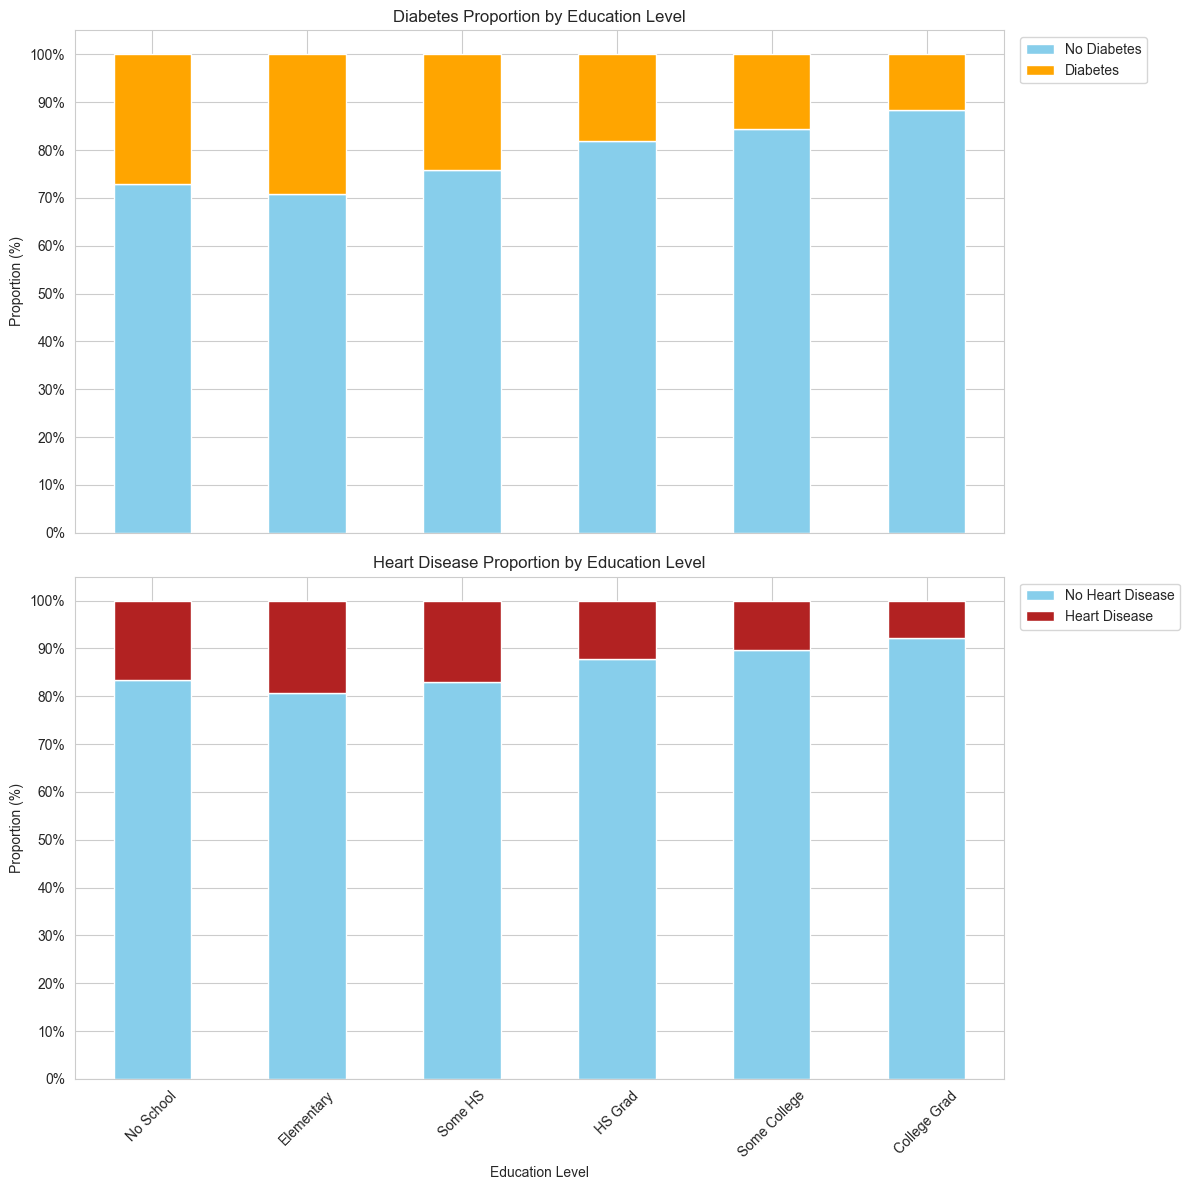

In [91]:
# Create a 2-row subplot (1 column)
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Common x-axis labels
edu_labels = [
    'No School', 'Elementary', 'Some HS',
    'HS Grad', 'Some College', 'College Grad'
]

# --- Plot 1: Diabetes ---
edu_diabetes = df.groupby('Education')['Diabetes_binary'].value_counts(normalize=True).unstack()
edu_diabetes.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=axes[0])

axes[0].set_title('Diabetes Proportion by Education Level')
axes[0].set_ylabel('Proportion (%)')
axes[0].set_yticks([i / 10 for i in range(11)])
axes[0].set_yticklabels([f'{i*10}%' for i in range(11)])
axes[0].legend(['No Diabetes', 'Diabetes'], bbox_to_anchor=(1.01, 1))

# --- Plot 2: Heart Disease ---
edu_heart = df.groupby('Education')['HeartDiseaseorAttack'].value_counts(normalize=True).unstack()
edu_heart.plot(kind='bar', stacked=True, color=['skyblue', 'firebrick'], ax=axes[1])

axes[1].set_title('Heart Disease Proportion by Education Level')
axes[1].set_ylabel('Proportion (%)')
axes[1].set_xticks(ticks=range(len(edu_labels)))
axes[1].set_xticklabels(edu_labels, rotation=45)
axes[1].set_yticks([i / 10 for i in range(11)])
axes[1].set_yticklabels([f'{i*10}%' for i in range(11)])
axes[1].legend(['No Heart Disease', 'Heart Disease'], bbox_to_anchor=(1.01, 1))

# Final layout adjustments
plt.xlabel('Education Level')
plt.tight_layout()
plt.show()


## Education's Impact on Diabetes and Heart Disease Risk

These charts reveal an interesting pattern: higher education levels appear to be associated with lower rates of both diabetes and heart disease.

### For Diabetes:
- Those with no formal education have the highest diabetes rate at about 27% (orange portion)
- The rate gradually decreases as education increases
- College graduates have the lowest rate at about 12%
- This represents more than a 50% reduction in diabetes prevalence from the lowest to highest education level

### For Heart Disease:
- A similar pattern emerges, with about 17% of those with no formal education having heart disease (red portion)
- The rate decreases to about 7% among college graduates
- This trend is consistent across all education levels, showing a clear inverse relationship

These findings suggest that education may play a protective role against both conditions. This could be due to better health literacy, access to healthcare resources, and healthier lifestyle choices that often come with higher education levels. The data underscores the importance of health education and awareness across all educational backgrounds.

In [92]:
# Handle outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_iqr = remove_outliers(df, ['BMI','Age'])

# Drop rows where BMI is less than 15
df_iqr = df_iqr[df_iqr['BMI'] >= 15]

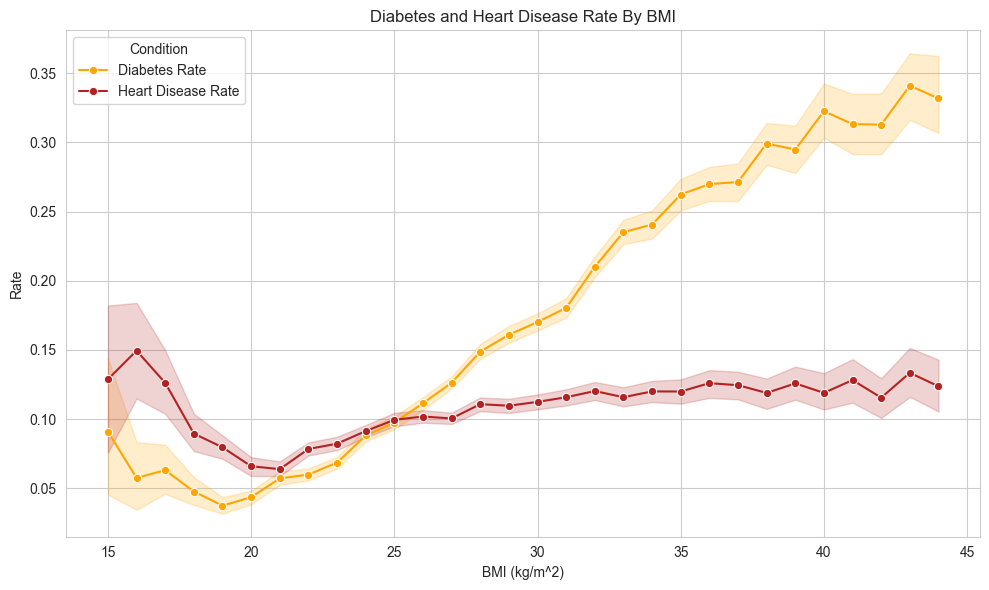

In [93]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot Diabetes Rate
sns.lineplot(
    data=df_iqr,
    x='BMI',
    y='Diabetes_binary',
    errorbar=('ci', 95),
    marker='o',
    label='Diabetes Rate',
    color='orange'
)

# Plot Heart Disease Rate
sns.lineplot(
    data=df_iqr,
    x='BMI',
    y='HeartDiseaseorAttack',
    errorbar=('ci', 95),
    marker='o',
    label='Heart Disease Rate',
    color='firebrick'
)

# Labels and title
plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Rate')
plt.title('Diabetes and Heart Disease Rate By BMI')

# Legend and grid
plt.legend(title='Condition', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## BMI and Its Clear Connection to Diabetes and Heart Disease

This line graph tells a compelling story about how Body Mass Index (BMI) relates to the risk of both diabetes and heart disease.

### Key Findings:
- For diabetes (orange line), there's a dramatic increase as BMI rises:
  - Low risk (under 5%) for BMI below 20
  - Moderate risk (5-15%) for BMI between 20-30
  - High risk (15-35%) for BMI above 30
  
- For heart disease (red line), the relationship is more stable:
  - Risk generally stays between 10-15% across all BMI levels
  - Slight increase with higher BMI, but not as steep as diabetes
  
### Important Insights:
- At a BMI of 20, diabetes risk is at its lowest (around 4%)
- After BMI 25, diabetes risk begins to climb sharply
- By BMI 35, diabetes risk triples to over 25%
- Heart disease maintains a relatively consistent 10-13% risk regardless of BMI

This data strongly suggests that maintaining a healthy BMI, particularly below 25, is crucial for diabetes prevention. While BMI also affects heart disease risk, the impact is less pronounced.

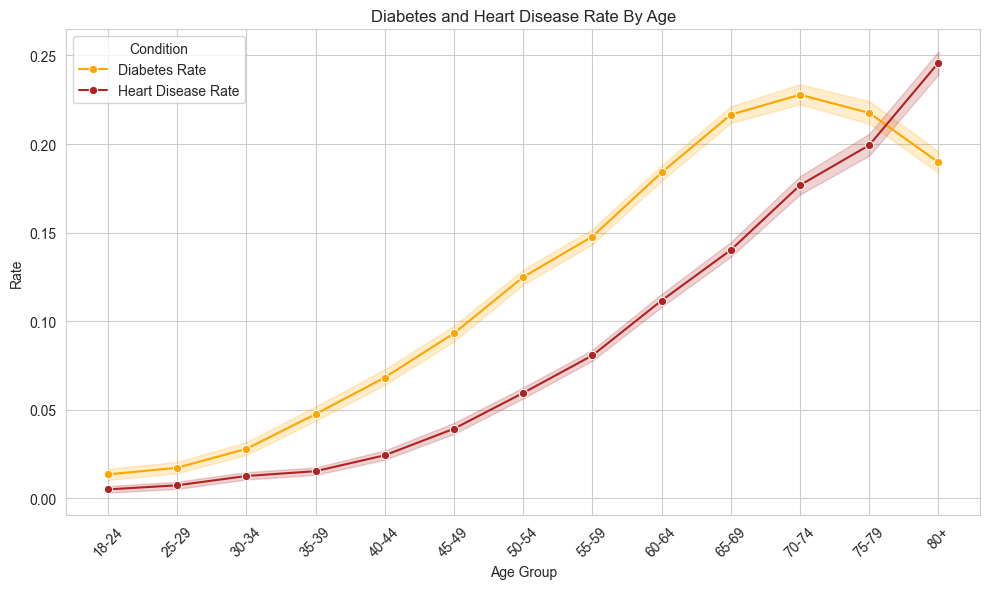

In [94]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot Diabetes Rate
sns.lineplot(
    data=df_iqr,
    x='Age',
    y='Diabetes_binary',
    errorbar=('ci', 95),
    marker='o',
    label='Diabetes Rate',
    color='orange'
)

# Plot Heart Disease Rate
sns.lineplot(
    data=df_iqr,
    x='Age',
    y='HeartDiseaseorAttack',
    errorbar=('ci', 95),
    marker='o',
    label='Heart Disease Rate',
    color='firebrick'
)

# Custom age group labels
age_labels = [
    '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'
]

# Replace x-tick labels
plt.xticks(ticks=range(1, 14), labels=age_labels, rotation=45)

# Labels and title
plt.xlabel('Age Group')
plt.ylabel('Rate')
plt.title('Diabetes and Heart Disease Rate By Age')

# Legend and grid
plt.legend(title='Condition')
plt.grid(True)
plt.tight_layout()
plt.show()


## How Age Influences Your Risk of Diabetes and Heart Disease

This graph clearly shows how the risk of both diabetes and heart disease increases significantly with age, though their patterns differ.

### Diabetes Risk (Orange Line):
- Young adults (18-24) have minimal risk at just 1.4%
- Risk gradually increases through middle age
- Peaks at age 70-74 with 23% risk
- Slightly decreases for those 80+ (19%)

### Heart Disease Risk (Red Line):
- Starts very low at 0.7% for young adults
- Rises more slowly than diabetes through middle age
- Continues climbing steadily to 25% for those 80+
- Unlike diabetes, doesn't decline in the oldest age group

### Critical Observations:
- Both conditions become significantly more common after age 45
- Diabetes risk accelerates faster in middle age (45-64)
- Heart disease risk continues to rise through all age groups
- By age 80+, both conditions affect nearly 1 in 4 individuals

This pattern emphasizes the importance of preventive health measures as we age, particularly for those entering their 40s and beyond. Regular health screenings become increasingly vital with each passing decade.

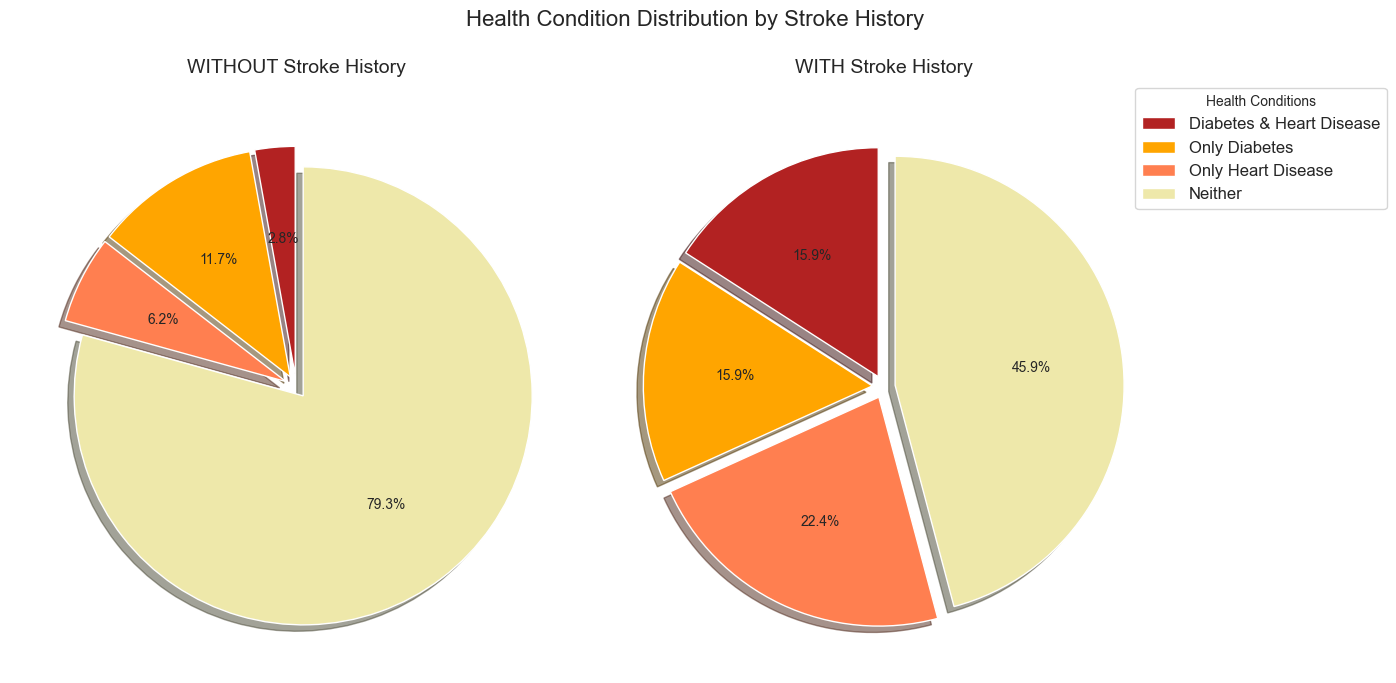

In [95]:
import matplotlib.pyplot as plt

# Create subsets for stroke and non-stroke groups
stroke = df[df['Stroke'] == 1]
no_stroke = df[df['Stroke'] == 0]

# Calculate proportions for each group
def calculate_proportions(group):
    both = ((group['Diabetes_binary'] == 1) & (group['HeartDiseaseorAttack'] == 1)).mean()
    only_diabetes = ((group['Diabetes_binary'] == 1) & (group['HeartDiseaseorAttack'] == 0)).mean()
    only_heart = ((group['Diabetes_binary'] == 0) & (group['HeartDiseaseorAttack'] == 1)).mean()
    neither = ((group['Diabetes_binary'] == 0) & (group['HeartDiseaseorAttack'] == 0)).mean()
    return [both, only_diabetes, only_heart, neither]

stroke_props = calculate_proportions(stroke)
no_stroke_props = calculate_proportions(no_stroke)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Custom colors and explode
colors = ['firebrick','orange','coral','palegoldenrod']
explode = (0.05, 0.05, 0.05, 0.05)
categories = ['Diabetes & Heart Disease', 'Only Diabetes', 'Only Heart Disease', 'Neither']

# Stroke group pie chart (percentages centered)
wedges1, texts1, autotexts1 = ax1.pie(no_stroke_props, explode=explode, colors=colors,
                                     autopct='%1.1f%%', shadow=True, startangle=90,
                                     textprops={'fontsize': 10})
ax1.set_title('WITHOUT Stroke History', fontsize=14, pad=20)

# Non-stroke group pie chart (percentages centered)
wedges2, texts2, autotexts2 = ax2.pie(stroke_props, explode=explode, colors=colors,
                                     autopct='%1.1f%%', shadow=True, startangle=90,
                                     textprops={'fontsize': 10})
ax2.set_title('WITH Stroke History', fontsize=14, pad=20)

# Create a shared legend on the right side
fig.legend(wedges1, categories, 
           title="Health Conditions",
           loc="upper right",
           bbox_to_anchor=(1.0, 0.9),
           fontsize=12)

# Adjust the position of percentage text to ensure they're centered
for autotext in autotexts1 + autotexts2:
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')

# Add overall title
plt.suptitle('Health Condition Distribution by Stroke History', fontsize=16, y=1.0)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave 15% space on right for legend

plt.show()

## The Connection Between Stroke History and Other Health Conditions

These pie charts reveal a striking relationship between stroke history and the prevalence of diabetes and heart disease.

### For People WITHOUT Stroke History:
- 79.3% have neither diabetes nor heart disease
- 11.7% have only diabetes
- 6.2% have only heart disease
- 2.8% have both conditions

### For People WITH Stroke History:
- Only 45.9% have neither diabetes nor heart disease
- 15.9% have only diabetes
- 22.4% have only heart disease
- 15.9% have both conditions

### Key Insights:
- Having a stroke history dramatically increases the likelihood of having other conditions
- Heart disease is 3.6 times more common in stroke survivors (22.4% vs 6.2%)
- People with stroke history are 5.7 times more likely to have both diabetes and heart disease (15.9% vs 2.8%)
- Over half (54.1%) of stroke survivors have at least one other condition, compared to just 20.7% of those without stroke history

This data highlights the interconnected nature of these conditions and suggests that stroke survivors need comprehensive health management to address their increased risk of diabetes and heart disease.

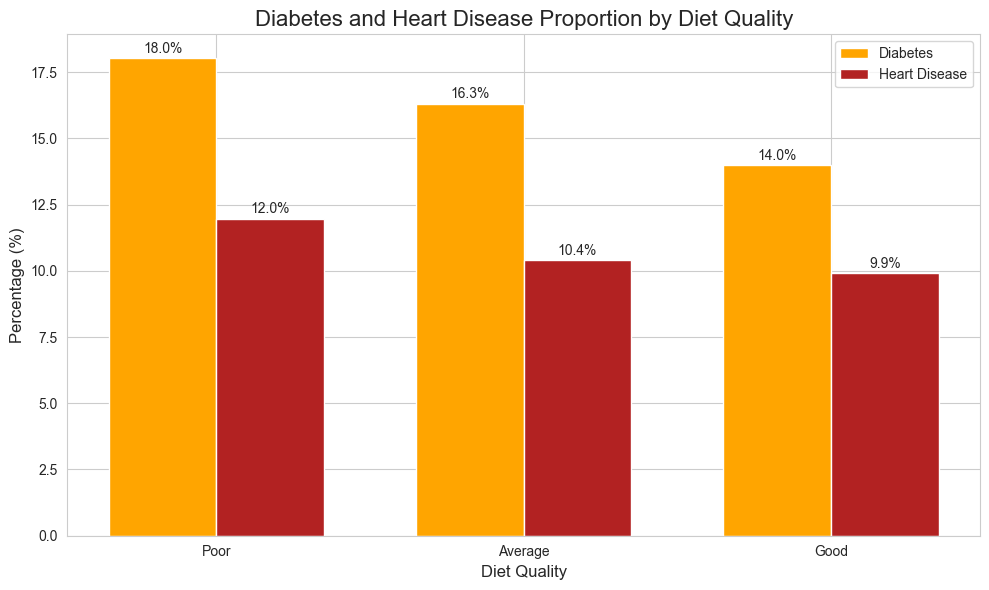

In [96]:
# Create categorical variable for diet quality
df['FruitVegScore'] = df['Fruits'] + df['Veggies']
df['Diet'] = df['FruitVegScore'].map({0: 'Poor', 1: 'Average', 2: 'Good'})

# --- Prepare Data ---
# Mean diabetes and heart disease rates per diet group
diabetes = df.groupby('Diet', observed=False)['Diabetes_binary'].mean()
heart_disease = df.groupby('Diet', observed=False)['HeartDiseaseorAttack'].mean()

# Force the diet categories to be in a specific order
ordered_diets = ['Poor', 'Average', 'Good']
diabetes = diabetes.reindex(ordered_diets)
heart_disease = heart_disease.reindex(ordered_diets)

# Diet categories and positions
diet_categories = ordered_diets
x = np.arange(len(diet_categories))

# Values
diabetes_vals = diabetes.values * 100
heart_vals = heart_disease.values * 100

# Bar width
width = 0.35

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, diabetes_vals, width, label='Diabetes', color='orange')
bars2 = ax.bar(x + width/2, heart_vals, width, label='Heart Disease', color='firebrick')

# Labels and title
ax.set_title('Diabetes and Heart Disease Proportion by Diet Quality', fontsize=16)
ax.set_xlabel('Diet Quality', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(diet_categories)

# Add percentage labels above bars
for i in range(len(x)):
    ax.text(x[i] - width/2, diabetes_vals[i] + 0.2, f'{diabetes_vals[i]:.1f}%', ha='center', fontsize=10)
    ax.text(x[i] + width/2, heart_vals[i] + 0.2, f'{heart_vals[i]:.1f}%', ha='center', fontsize=10)

# Legend and layout
ax.legend()
plt.tight_layout()
plt.show()

## Diet Quality Matters: The Impact of Healthy Eating on Diabetes and Heart Disease

This bar chart demonstrates a clear relationship between diet quality and the prevalence of both diabetes and heart disease.

### Key Findings:

#### For Diabetes (Orange Bars):
- Poor diet: 18.0% prevalence
- Average diet: 16.3% prevalence 
- Good diet: 14.0% prevalence

#### For Heart Disease (Red Bars):
- Poor diet: 12.0% prevalence
- Average diet: 10.4% prevalence
- Good diet: 9.9% prevalence

### Important Insights:
- Both conditions show a consistent decrease as diet quality improves
- People with poor diets are 1.3 times more likely to have diabetes compared to those with good diets
- Heart disease risk is about 1.2 times higher in those with poor diets versus good diets
- Improving diet from poor to good quality could reduce diabetes risk by 22% and heart disease risk by 17.5%

This data clearly shows that making better dietary choices – such as eating more fruits and vegetables – can significantly reduce your risk of developing these serious health conditions.

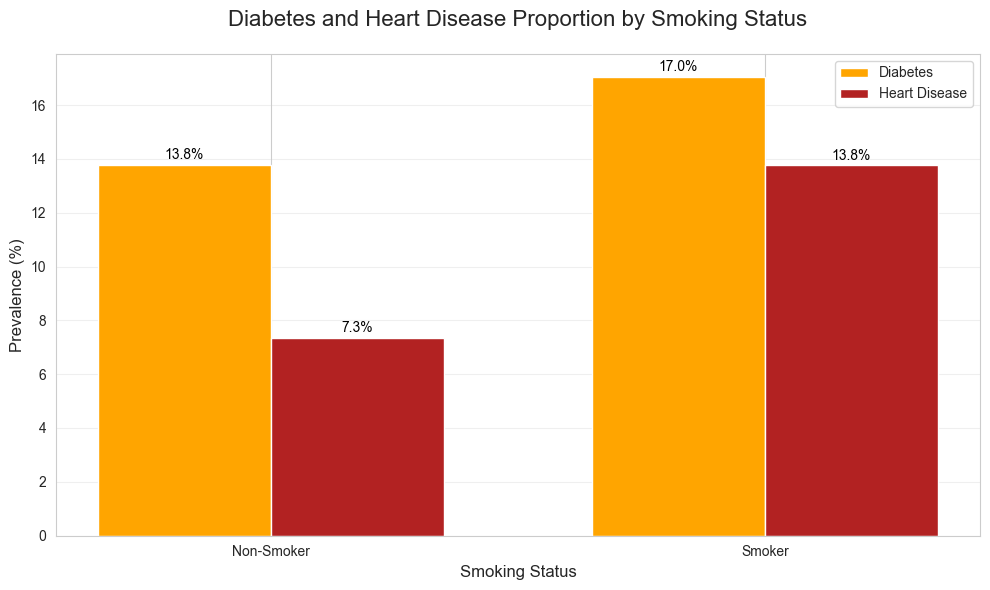

In [105]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))

# Group by Smoking status and get the mean of each condition
diabetes = df.groupby('Smoker', observed=False)['Diabetes_binary'].mean()
heart_disease = df.groupby('Smoker', observed=False)['HeartDiseaseorAttack'].mean()

# Ensure categories are ordered if necessary
smoking_labels = ['Non-Smoker', 'Smoker']

# Positions on the x-axis
x = np.arange(len(smoking_labels))

# Convert proportions to percentages
diabetes_vals = diabetes.values * 100
heart_vals = heart_disease.values * 100

# Set bar width
width = 0.35

# Create bars for diabetes and heart disease
bars1 = ax.bar(x - width/2, diabetes_vals, width, 
               label='Diabetes', color='orange')
bars2 = ax.bar(x + width/2, heart_vals, width, 
               label='Heart Disease', color='firebrick')

# Labels and title
ax.set_title('Diabetes and Heart Disease Proportion by Smoking Status', 
             fontsize=16, pad=20)
ax.set_xlabel('Smoking Status', fontsize=12)
ax.set_ylabel('Prevalence (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(smoking_labels)
# Add percentage labels ON TOP of bars (changed to black and position)
for i in range(len(x)):
    ax.text(x[i] - width/2, diabetes_vals[i] + .1,  # +1 puts it just above the bar
            f'{diabetes_vals[i]:.1f}%', 
            ha='center', va='bottom', color='black', fontsize=10)  # Changed to black
    ax.text(x[i] + width/2, heart_vals[i] + .1, 
            f'{heart_vals[i]:.1f}%', 
            ha='center', va='bottom', color='black', fontsize=10)  # Changed to black

# Add grid and legend
ax.grid(axis='y', alpha=0.3)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Smoking's Significant Impact on Diabetes and Heart Disease Risk

This bar chart reveals the concerning relationship between smoking status and the prevalence of both diabetes and heart disease.

### Key Statistics:

#### For Diabetes (Orange Bars):
- Non-smokers: 13.8% prevalence
- Smokers: 17.0% prevalence
- Increase: 3.2 percentage points (23% higher risk)

#### For Heart Disease (Red Bars):
- Non-smokers: 7.3% prevalence
- Smokers: 13.8% prevalence
- Increase: 6.5 percentage points (89% higher risk)

### Critical Insights:
- Smoking nearly doubles your risk of heart disease (from 7.3% to 13.8%)
- Diabetes risk increases by nearly a quarter for smokers
- Smokers have the same rate of heart disease (13.8%) as non-smokers have diabetes
- The impact on heart disease is more severe than on diabetes

This data provides compelling evidence that quitting smoking or never starting can significantly reduce your risk of developing these serious health conditions, particularly heart disease.